In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('rdu-weather-history.csv',  sep = ';')

In [3]:
df

,date,tmin,tmax,prcp,snow,snwd,awnd
0,2017-01-09,9,31,0.00,0.0,1.2,2.46
1,2017-01-11,40,57,0.00,0.0,0.0,6.04
2,2017-01-19,36,63,0.00,0.0,0.0,1.34
3,2017-01-20,46,59,0.09,0.0,0.0,2.91
4,2017-01-24,41,63,0.00,0.0,0.0,6.04
...,...,...,...,...,...,...,...
1972,2022-05-14,64,80,0.00,0.0,0.0,2.50
1973,2022-05-16,64,87,0.01,0.0,0.0,7.40
1974,2022-05-23,67,85,1.29,0.0,0.0,6.00
1975,2022-05-25,60,68,0.00,0.0,0.0,7.80


In [4]:
df.isnull().sum()

date    0
tmin    0
tmax    0
prcp    0
snow    0
snwd    1
awnd    4
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['snwd'].fillna(df['snwd'].mean(),inplace=True)

df['awnd'].fillna(df['awnd'].mean(),inplace=True)
    

In [7]:
df.isnull().sum()

date    0
tmin    0
tmax    0
prcp    0
snow    0
snwd    0
awnd    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1977 non-null   object 
 1   tmin    1977 non-null   int64  
 2   tmax    1977 non-null   int64  
 3   prcp    1977 non-null   float64
 4   snow    1977 non-null   float64
 5   snwd    1977 non-null   float64
 6   awnd    1977 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 108.2+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

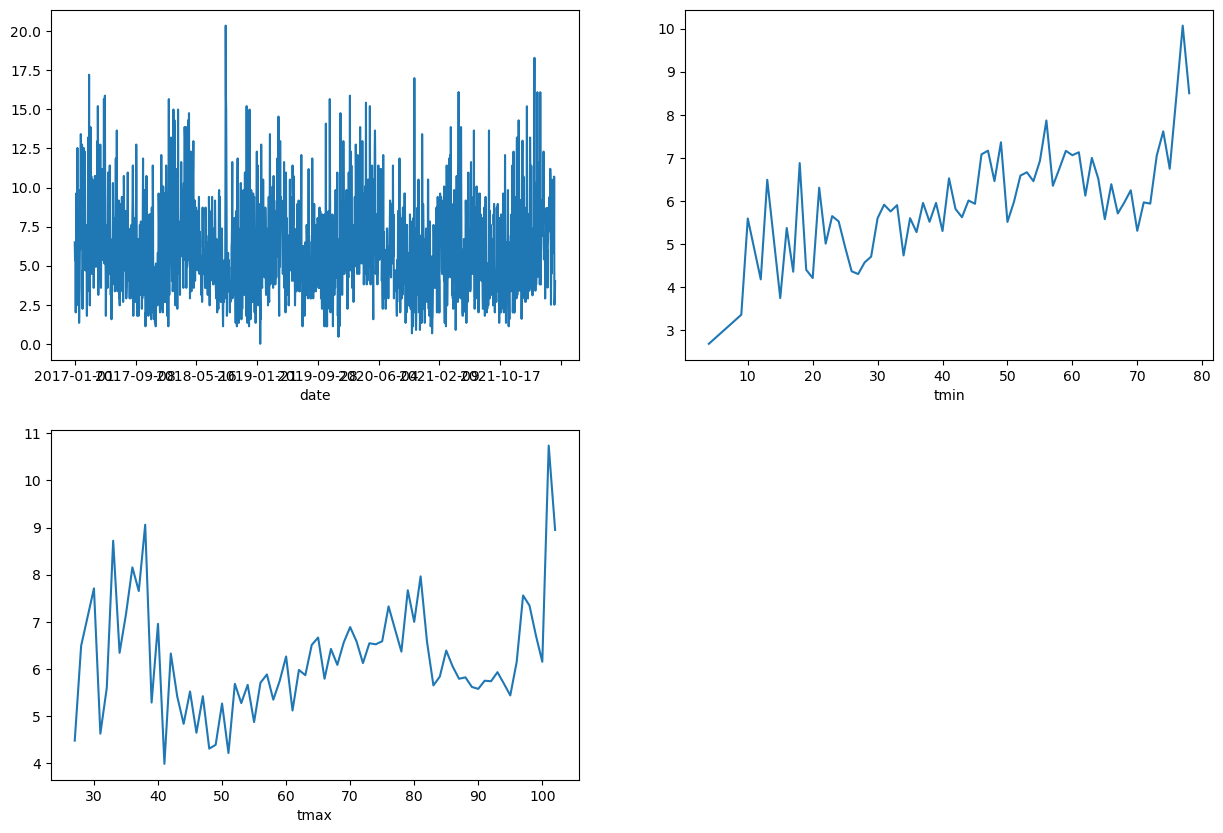

In [10]:
features = ['date', 'tmin', 'tmax']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['awnd'].plot()
plt.show()

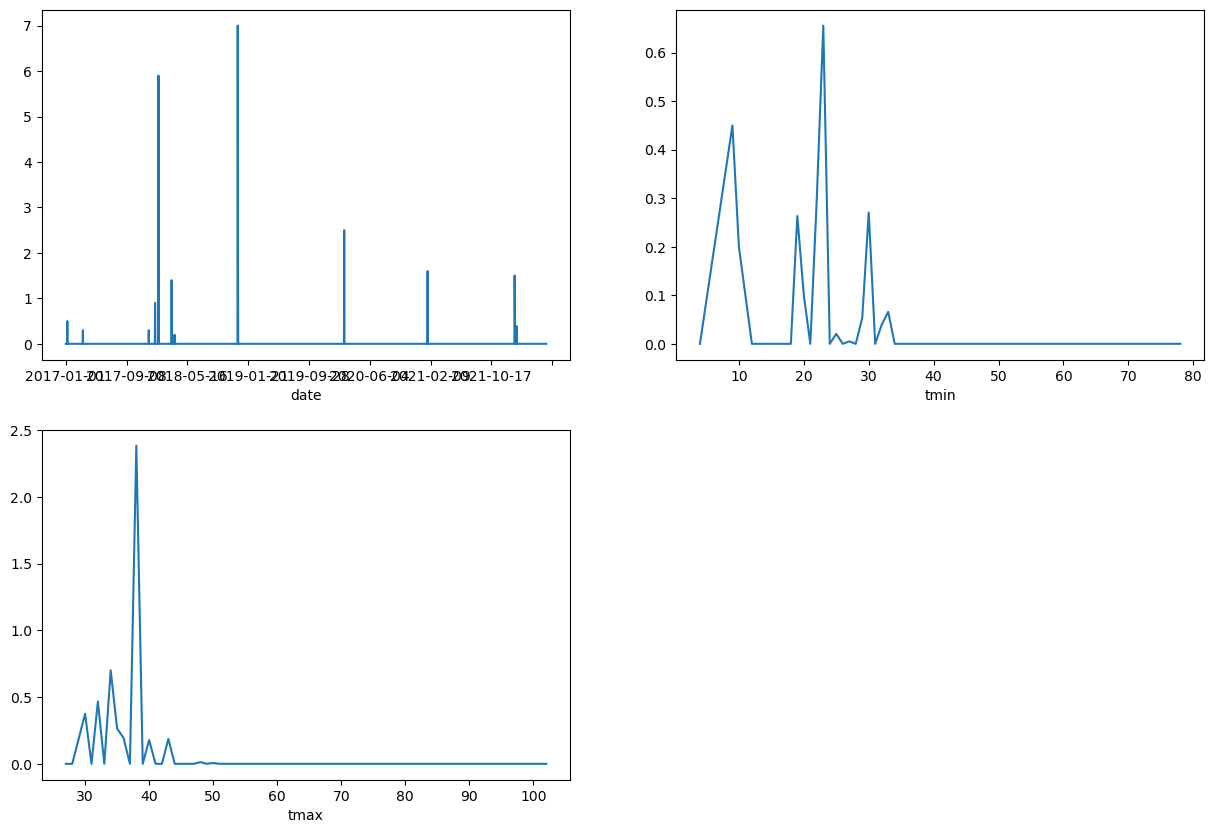

In [11]:
features = ['date', 'tmin', 'tmax']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['snow'].plot()
plt.show()

/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


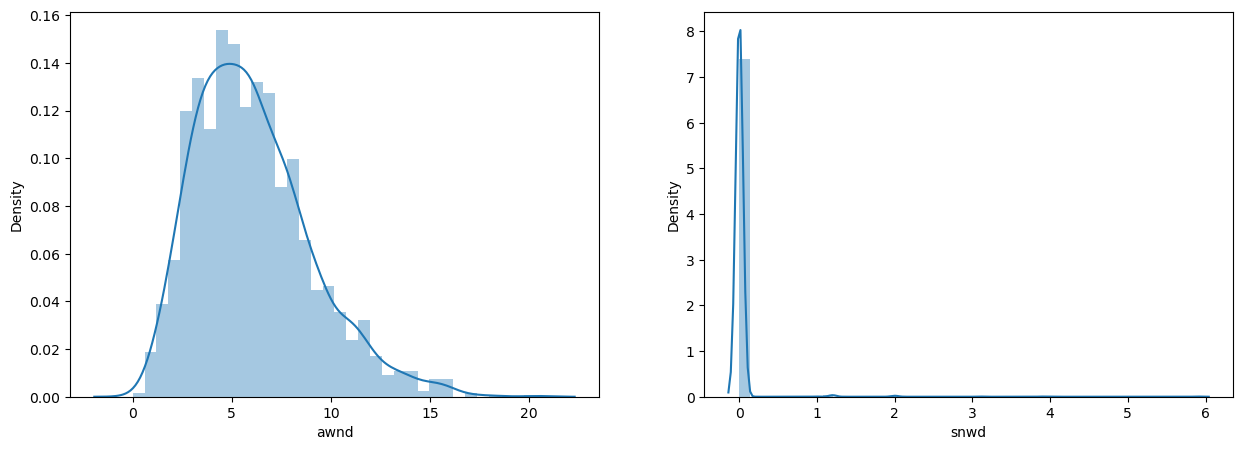

In [12]:
features = ['awnd', 'snwd']
  
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sn.distplot(df[col])
plt.show()

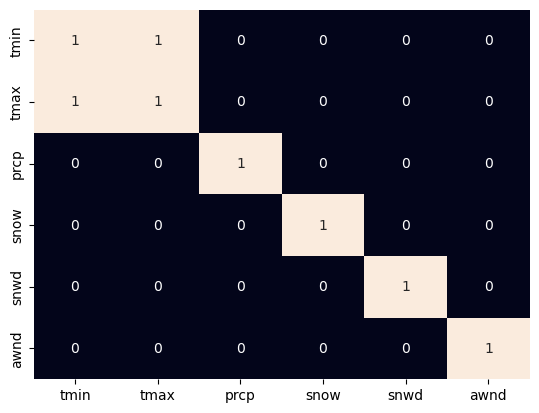

In [13]:
sn.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor

#feature selection
features = df.drop(['date'], axis=1)
target = df['snow'].values
  
x_train, x_test, y_train, y_test = train_test_split(features,
                                                  target,
                                                  test_size = 0.2,
                                                  random_state=20)



In [15]:
x_train.shape, x_test.shape

((1581, 6), (396, 6))

In [16]:
#scaling or nomalizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
#applying Xgboost
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
xgboost = XGBRegressor()
xgboost.fit(x_train, y_train)
y_pred =xgboost.predict(x_test).round()


In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
precision= precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print('XGBoost Error:', precision, recall, f1_score)
print()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets